In [1]:
'''
Project Overview[Ice Cream Sales Seasonal Performance Assessment]:
This project seeks to investigate seasonal sales patterns through comprehensive data analysis. 

Goals:To understand how temperature variations and unique transaction characteristics impact ice cream sales volume
    :To perform detailed data cleaning and exploratory analysis to uncover meaningful insights about seasonal sales performance.

'''

'\nProject Overview[Ice Cream Sales Seasonal Performance Assessment]:\nThis project seeks to investigate seasonal sales patterns through comprehensive data analysis. \n\nGoals:To understand how temperature variations and unique transaction characteristics impact ice cream sales volume\n    :To perform detailed data cleaning and exploratory analysis to uncover meaningful insights about seasonal sales performance.\n\n'

In [2]:
# Importing necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Getting the Dataset
ice_cream_sales_data = pd.read_csv(r'D:\Data Journey\Python-Summer-Party\DataSets\ice_cream_sales_data.csv')

# Display the first few rows to understand the data
print(ice_cream_sales_data .head(10))  # Shows the first 5 rows with columns
print(list(ice_cream_sales_data .columns))
print('Number of rows and columns is:', ice_cream_sales_data .shape)

    sale_date  temperature                product_name  sales_volume  \
0    7/5/2024         62.0               Cherry Garcia            23   
1   8/15/2024         64.0               Chunky Monkey            26   
2   9/25/2024         66.0                  Phish Food            29   
3   10/5/2024         68.0             Americone Dream            32   
4  11/15/2024         70.0     Chocolate Fudge Brownie            35   
5  12/25/2024         72.0                  Half Baked            38   
6    1/5/2025         74.0  New York Super Fudge Chunk            41   
7   2/15/2025         76.0               Cherry Garcia            44   
8   3/25/2025         78.0               Chunky Monkey            47   
9    4/5/2025         80.0                  Phish Food            50   

  transaction_id  
0         TX0001  
1         TX0002  
2         TX0003  
3         TX0004  
4         TX0005  
5         TX0006  
6         TX0007  
7         TX0008  
8         TX0009  
9         TX0010 

In [4]:
# Question One:
# Data Cleaning to remove duplicate sales transactions from the dataset to ensure accurate analysis of seasonal patterns
# 0. Check for duplicate transaction IDs
duplicated_sales_transactions = ice_cream_sales_data['transaction_id'].duplicated().sum()
print(f'Number of duplicated sales transactions: {duplicated_sales_transactions}')

# 1. Drop duplicates based on 'transaction_id' (keeping the first occurrence)
ice_cream_sales_data = ice_cream_sales_data.drop_duplicates(subset='transaction_id', keep='first').reset_index(drop=True)
print(f"Dataset shape after removing duplicates: {ice_cream_sales_data.shape}")

Number of duplicated sales transactions: 0
Dataset shape after removing duplicates: (59, 5)


In [16]:
# Quetion Two:
# Creating a pivot table to summarize the total sales volume of ice cream products by month and temperature range. 

# Convert sale_date to datetime
ice_cream_sales_data['sale_date'] = pd.to_datetime(ice_cream_sales_data['sale_date'])
# Extract month number
ice_cream_sales_data['month'] = ice_cream_sales_data['sale_date'].dt.month

# Create temperature bins
bins = [-np.inf, 60, 70, 80, 90, 100, np.inf]
labels = ['<60', '60-69', '70-79', '80-89', '90-99', '100+']

ice_cream_sales_data['temperature_range'] = pd.cut(ice_cream_sales_data['temperature'],bins=bins,labels=labels,right=False)

pivot_table = pd.pivot_table(ice_cream_sales_data,values='sales_volume',index='month',columns='temperature_range',aggfunc='sum',fill_value=0)

print(pivot_table)

temperature_range  <60  60-69  70-79  80-89  90-99  100+
month                                                   
1                    0    190     41    149      0     0
2                    0    116    102     22      0    80
3                   25    119    130     61      0     0
4                    0    122      0    114     28     0
5                    0    156     89    120      0     0
6                    0     34    220   1000      0     0
7                    0     60   1295     59      0     0
8                    0     66    134    160      0     0
9                    0     72    137    101     65     0
10                   0    100    186    104      0     0
11                   0     71     84    250      0     0
12                   0     74     90    256      0     0


C:\Users\enock\AppData\Local\Temp\ipykernel_15312\961717735.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(ice_cream_sales_data,values='sales_volume',index='month',columns='temperature_range',aggfunc='sum',fill_value=0)


Outliers in Monthly Sales:
   month  Total Sales
5      6         1254
6      7         1414


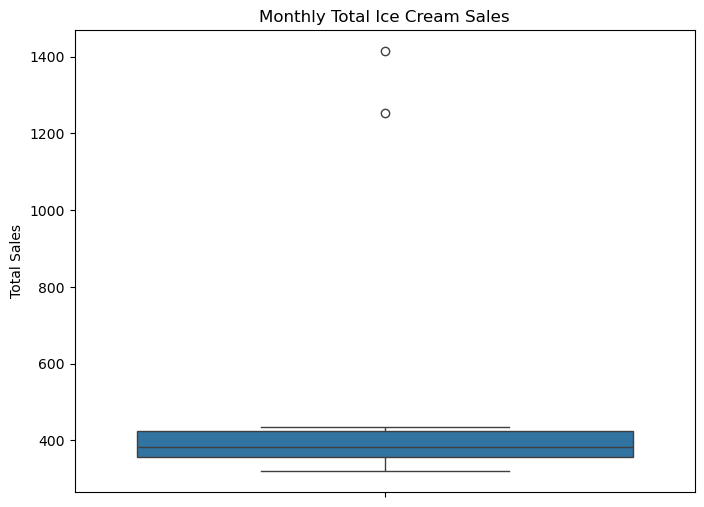

In [23]:
# Aggregate sales by month
sales_vol_month = (
    ice_cream_sales_data
    .groupby('month')['sales_volume']
    .sum()
    .reset_index(name='Total Sales')  # <- renamed here
)

# Calculate quartiles on the correct column
Q1 = sales_vol_month['Total Sales'].quantile(0.25)
Q3 = sales_vol_month['Total Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers using the correct column
outliers = sales_vol_month[
    (sales_vol_month['Total Sales'] < lower_bound) |
    (sales_vol_month['Total Sales'] > upper_bound)
]

print("Outliers in Monthly Sales:")
print(outliers)

# Using Seaborn for enhanced visuals
plt.figure(figsize=(8, 6))
sns.boxplot(y='Total Sales', data=sales_vol_month)
plt.title('Monthly Total Ice Cream Sales')
plt.ylabel('Total Sales')
plt.show()